In [1]:
#Importing dependancies

from newfileLR import key
import pandas as pd
import numpy as np
import time 
import gmaps
from newfileLR import gkey
import matplotlib.pyplot as plt
gmaps.configure(api_key=gkey)
API_KEY = key
%matplotlib notebook

In [2]:
#Loading the csv file to munge in pandas dataframe
bars_crime_df = pd.read_csv("bars_and_crime.csv")

bars_crime_df.head()

,name,review_count,lat,long,price,count of crimes,count_of_crimes
0,The Penthouse at Mastro's,4650,34.068933,-118.398747,$$$$,53,53
1,Gracias Madre - West Hollywood,4101,34.080795,-118.386972,$$,73,73
2,Taste on Melrose,2627,34.082573,-118.374798,$$,132,132
3,GRANVILLE,2622,34.145109,-118.255093,$$,40,40
4,Fig & Olive - Melrose Place,2488,34.083475,-118.376174,$$$,124,124


In [3]:
#Reduced the number of columns to just include the price and count of crimes columns
reduced_df = bars_crime_df[["price", "count_of_crimes"]]

In [4]:
#Checking to see the amount of bars per price point
cheap_bars = reduced_df.query('price == "$$"').price.count()
moderate_bars = reduced_df.query('price == "$$$"').price.count()
expensive_bars = reduced_df.query('price == "$$$$"').price.count()

bar_count = pd.DataFrame({"bars" : ["cheap", "moderate", "expensive"], "count" : [cheap_bars, moderate_bars, expensive_bars]})

bar_count

,bars,count
0,cheap,39
1,moderate,9
2,expensive,2


In [5]:
#Counted the number of crimes per price point and renamed the price category to read into the bar graph smoothly.
grouped_df = bars_crime_df.groupby(["price"]).sum()

grouped_df.reset_index(inplace=True)

grouped_df["price"] = ("Cheap", "Moderate", "Expensive")

grouped_df

,price,review_count,lat,long,count of crimes,count_of_crimes
0,Cheap,62830,1328.906927,-4614.951955,38445,38445
1,Moderate,16300,306.663880,-1065.073998,8534,8534
2,Expensive,5872,68.140872,-236.787159,126,126


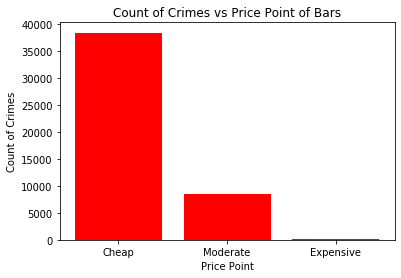

In [6]:
#Plotted and saved the results
fig, ax = plt.subplots()

ax.bar(grouped_df["price"], grouped_df["count_of_crimes"], color = "red")
ax.set_xlabel("Price Point")
ax.set_ylabel("Count of Crimes")
ax.set_title("Count of Crimes vs Price Point of Bars")
fig.savefig("count_crimes_bars.png");

In [15]:
#Created DataFrame to represent crime per bar per price point
divided_df = pd.DataFrame(grouped_df["count_of_crimes"].div(bar_count["count"]))
#Formatted the column name
divided_df.rename(columns = {0 : "crime_count_per_bar"}, inplace=True)
#Added price point for each ratio
divided_df["price"] = ("Cheap", "Moderate", "Expensive")

divided_df

,crime_count_per_bar,price
0,985.769231,Cheap
1,948.222222,Moderate
2,63.000000,Expensive


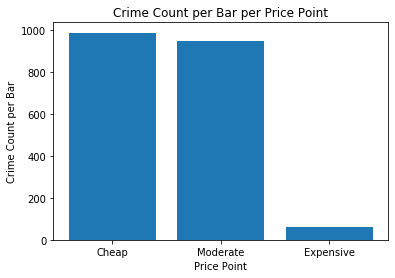

In [20]:
#Plotted the results of crime per bar per price point
fig2, ax2 = plt.subplots()
ax2.bar(divided_df["price"], divided_df["crime_count_per_bar"])
ax2.set_ylabel("Crime Count per Bar")
ax2.set_xlabel("Price Point")
ax2.set_title("Crime Count per Bar per Price Point")
fig2.savefig("crime_count_per_bar_per_price.png");